## Data enhancement

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

### Pre-processing images in data

#### Image enhancement
The process of improving the appearance of images to highlight specific features, reduce noise or improve the quality of the image, this helps it to be more suitable for analysis.

Alpha focuses on the contrast of image
- alpha greater than 1: images brighter, enhanced contrast
- alpha less than 1: images darker, reduced contrast

Beta focuses on brightness of image
- beta positive: makes images brighter
- beta negative: makes images darker

In [2]:
train_data = pd.read_csv("datasets/csv/train_data.csv")
test_data = pd.read_csv("datasets/csv/test_data.csv")

## PREPROCESSING IMAGES WITH ENHANCEMENT
def preprocess_image(img_path):
    # reading images
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # enhancing image
    img = cv2.convertScaleAbs(img, alpha = 1.5, beta = -20)
    # target_size of 224, 224 commonly used for image classification
    img = cv2.resize(img, (224, 224))
    # normalising pixel values
    img_array = img.astype(np.float32) / 255
    return img_array

In [3]:
# using preprocessed images as train data
train_images = np.array([preprocess_image(image_path) for image_path in train_data["image_path"]])
# using "pathology" column as train labels
train_labels = np.array(train_data["pathology"])

# change "BENIGN_WITHOUT_CALLBACK" to "BENIGN"
train_labels[train_labels == "BENIGN_WITHOUT_CALLBACK"] = "BENIGN"

In [4]:
# using preprocessed images as test data
test_images = np.array([preprocess_image(image_path) for image_path in test_data["image_path"]])
# using "pathology" column as test labels
test_labels = np.array(test_data["pathology"])

# change "BENIGN_WITHOUT_CALLBACK" to "BENIGN"
test_labels[test_labels == "BENIGN_WITHOUT_CALLBACK"] = "BENIGN"

#### Image augmentation
```ImageDataGenerator``` provides real-time data augmentation. Generates augmented images on-the-fly. For this project it is fixed so just need horizontal and vertical flips.

In [5]:
## IMAGE AUGMENTATION USING TENSORFLOW
datagen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest"
)

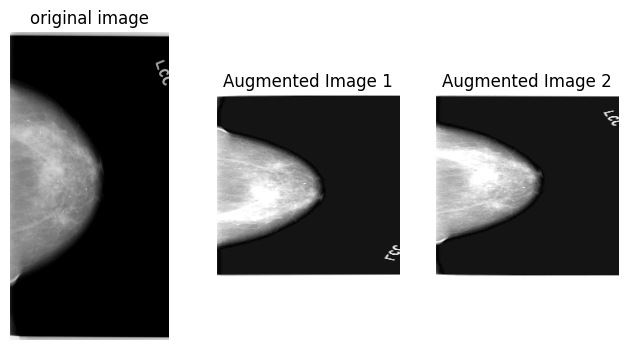

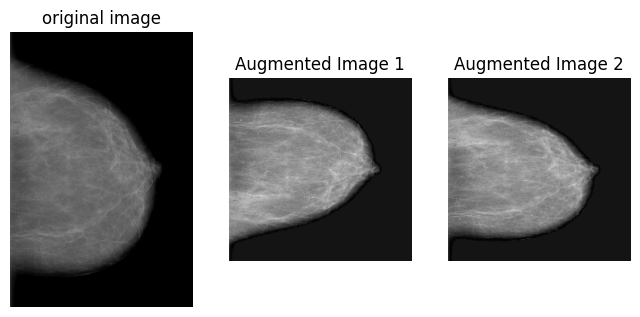

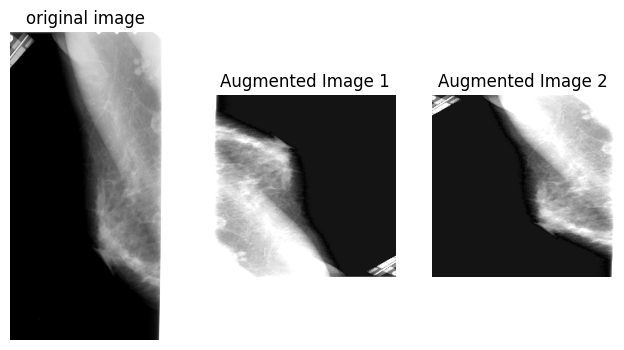

In [6]:
# display original and augmented images
for i, img_path in enumerate(train_data["image_path"][:3]): # displaying first 3
    original_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    enhanced_image = preprocess_image(img_path)
    
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap = "gray")
    plt.title("original image")
    plt.axis("off")
    
    # augment and plot image
    for j in range(2): # display original and 1 augmented
        augmented_image = datagen.random_transform(enhanced_image[:, :, np.newaxis])
        plt.subplot(1, 3, j+2)
        plt.imshow(augmented_image.squeeze(), cmap = "gray")
        plt.title(f'Augmented Image {j+1}')
        plt.axis("off")
    
    plt.show()

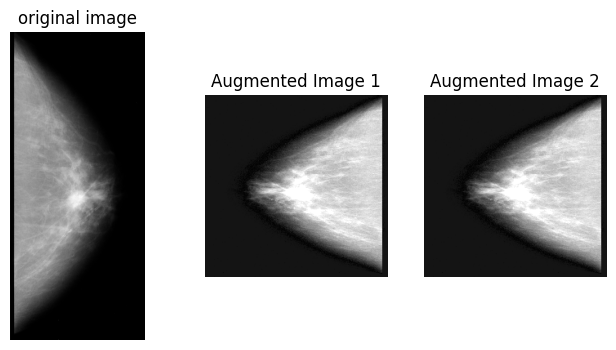

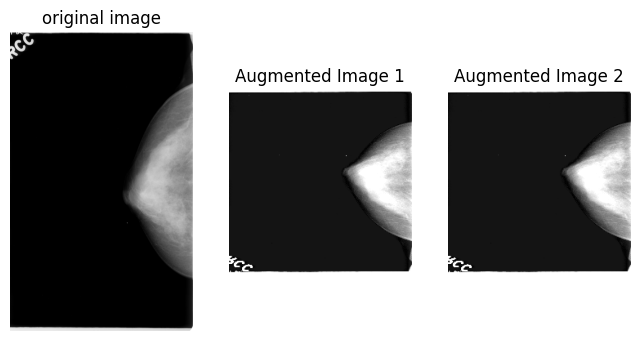

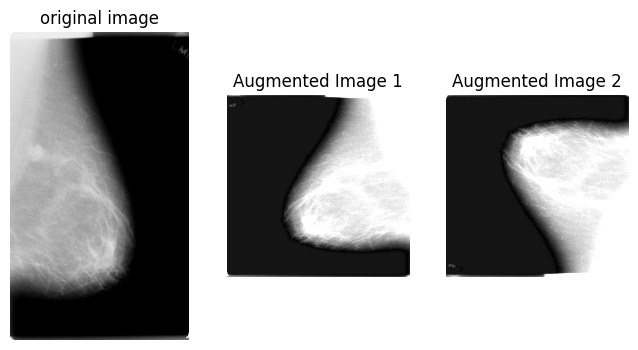

In [7]:
# display original and augmented images
for i, img_path in enumerate(test_data["image_path"][:3]): # displaying first 3
    original_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    enhanced_image = preprocess_image(img_path)
    
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap = "gray")
    plt.title("original image")
    plt.axis("off")
    
    # augment and plot image
    for j in range(2): # display original and 1 augmented
        augmented_image = datagen.random_transform(enhanced_image[:, :, np.newaxis])
        plt.subplot(1, 3, j+2)
        plt.imshow(augmented_image.squeeze(), cmap = "gray")
        plt.title(f'Augmented Image {j+1}')
        plt.axis("off")
    
    plt.show()